# Acerca del conjunto de datos
# Información del conjunto de datos
Este conjunto de datos contiene 416 registros de pacientes hepáticos y 167 registros de pacientes no hepáticos. Se recopiló de muestras de prueba en el noreste de Andhra Pradesh, India. "is_patient" es una etiqueta de clase que se utiliza para dividir en grupos (paciente hepático o no). Este conjunto de datos contiene 441 registros de pacientes masculinos y 142 registros de pacientes femeninas.
Cualquier paciente mayor de 89 años se registra como de 90 años.

# Información de atributos

* edad Edad del paciente
* género Género del paciente
* tot_bilirubin Bilirrubina total
* bilirrubina directa Bilirrubina directa
* alkphos Fosfotasa alcalina
* sgpt Alamina aminotransferasa
* Aspartato aminotransferasa
* tot_proteins Proteínas totales
* albúmina Albúmina
* ag_ratio Relación de albúmina y globulina
* is_patient Campo selector utilizado para     dividir los datos en dos conjuntos (etiquetados por los expertos)





# Importaciones

In [1]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

# Eda Carga y Exploración Inicial de Datos

In [2]:
path = 'C:\\Users\\gvald\\Desktop\\hepaticos\\Paciente-_hepaticos\\data\\Indian_Patient.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
tot_bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
direct_bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
tot_proteins,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
albumin,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
ag_ratio,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
sgpt,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
sgot,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
alkphos,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
is_patient,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [4]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df["is_patient"].value_counts()

is_patient
1    416
2    167
Name: count, dtype: int64

In [6]:
df["is_patient"] = df["is_patient"].replace({2: 0})

In [7]:
df["is_patient"].value_counts()

is_patient
1    416
0    167
Name: count, dtype: int64

In [8]:
(df == "?").sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [9]:
df.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [10]:
# Eliminar las filas ya que son datos sensibles que puede perjudicar el entrenamiento de pacientes de hepáticos
df = df[~df["alkphos"].isna()]

In [11]:
df.isna().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [12]:
# no hay duplicados solo son registros identicos
df[df.duplicated()]

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,0
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


# Análisis de Correlación

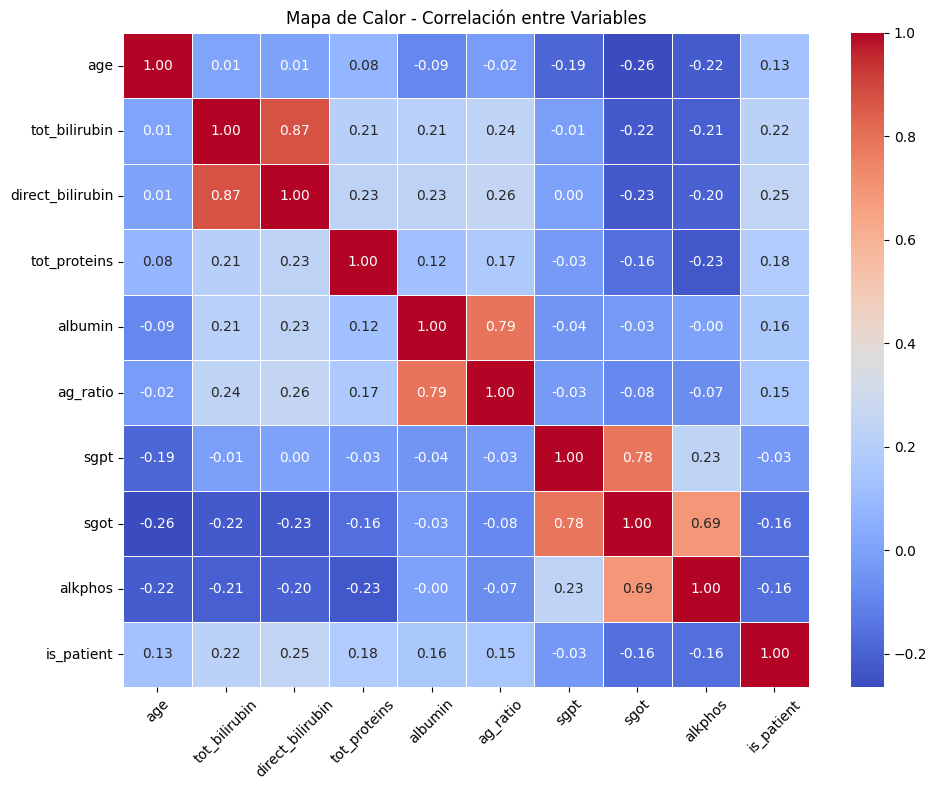

In [59]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout() 
roc_path = r"C:\Users\gvald\Desktop\hepaticos\Paciente-_hepaticos\reports\correlacion.png"
plt.savefig(roc_path)
plt.show() 
plt.close()

# Visualización de Datos

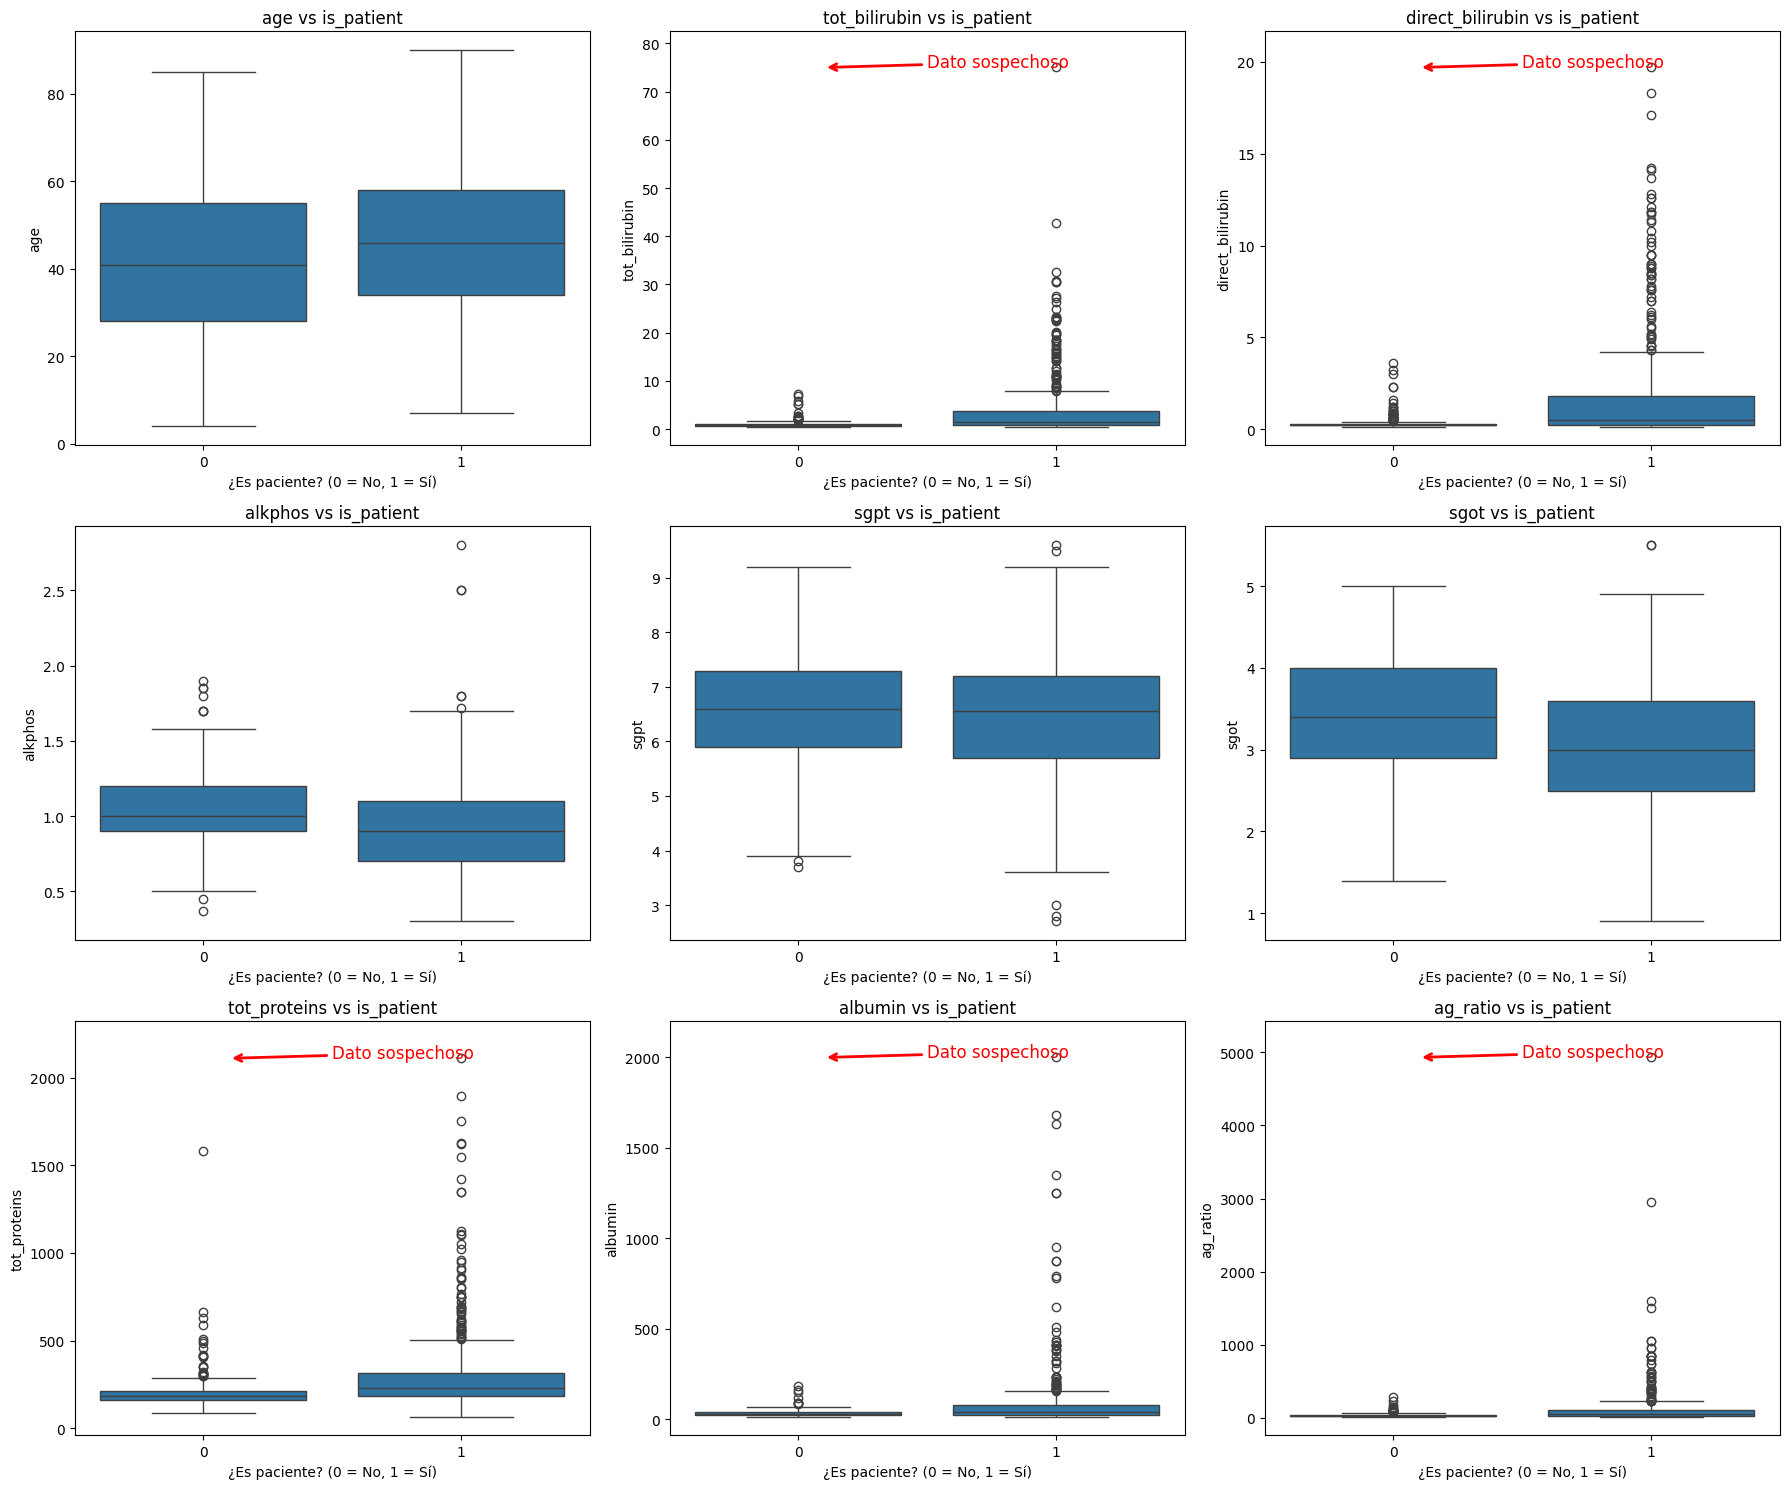

In [14]:
variables_clave = [
    'age', 'tot_bilirubin', 'direct_bilirubin',
    'alkphos', 'sgpt', 'sgot',
    'tot_proteins', 'albumin', 'ag_ratio'
]

# Crear figura y subplots dinámicamente
n = len(variables_clave)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(variables_clave):
    sns.boxplot(data=df, x='is_patient', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs is_patient')
    axes[i].set_xlabel('¿Es paciente? (0 = No, 1 = Sí)')
    axes[i].set_ylabel(col)

    if i in [1, 2,6,7,8]:
     max_val = df[col].max()
     axes[i].set_ylim(top=max_val * 1.1)
     axes[i].annotate(
        'Dato sospechoso',
        xy=(0.1, max_val),          # punto que señala (paciente=1)
        xytext=(0.5, max_val),    # texto a la derecha
        arrowprops=dict(color='red', arrowstyle='->', lw=2),
        fontsize=12,
        color='red'
    )


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.grid
plt.tight_layout()
plt.show()


Las flechas de los graficos indica el alto de muestra en los pacientes hepáticos

# Transformación de Columnas

In [15]:
X = df.drop(columns=['is_patient'])
y = df['is_patient']

In [16]:
num_cols = ['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'alkphos']
num_cat = ['gender']

In [17]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN  KNeighborsClassifier

In [18]:
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [19]:
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("modelo", KNeighborsClassifier())
])

In [20]:
knn_params = {
    "modelo__n_neighbors": [2, 3, 5, 10,20,30,40] # El nombre debe coincidir con el nombre del modelo.
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring="r2", n_jobs=-1)
knn_grid.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'modelo__n_neighbors': [2, 3, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('ord', ...)]"


In [21]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

In [22]:
print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)

KNN Regressor
Mejores parámetros: {'modelo__n_neighbors': 30}


In [23]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=30))
])

In [24]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

# LogisticRegression

In [26]:
# ColumnTransformer
preprocessor_Regresión = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [27]:
# Pipeline con logistic regression.
pipeline_line_Regresion = Pipeline([
    ('preprocessor', preprocessor_Regresión),
    ('regressor', LogisticRegression())
])

In [28]:
# Entrenar.
pipeline_line_Regresion.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
# Prediccion.
y_pred_line_Regresion = pipeline_line_Regresion.predict(X_test)

# RandomForestClassifier

In [30]:
# ColumnTransformer
pipeline_forest_regressor = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [31]:
# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", pipeline_forest_regressor),
    ("regressor", RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42))
])

In [32]:
pipeline_forest_regressor.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
# Prediccion.
y_pred_forest_regressor = pipeline_forest_regressor.predict(X_test)

# Resultados los 3 modelos y métricas
1. KNN Classifier :  0.64
2. Logistic Regression : 0.65
3. Random Forest Classifier :0.62

KNN Classifier
Mejores parámetros: {'modelo__n_neighbors': 30}
Accuracy: 0.63

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.50      0.05      0.09        43
           1       0.63      0.97      0.77        73

    accuracy                           0.63       116
   macro avg       0.57      0.51      0.43       116
weighted avg       0.58      0.63      0.51       116



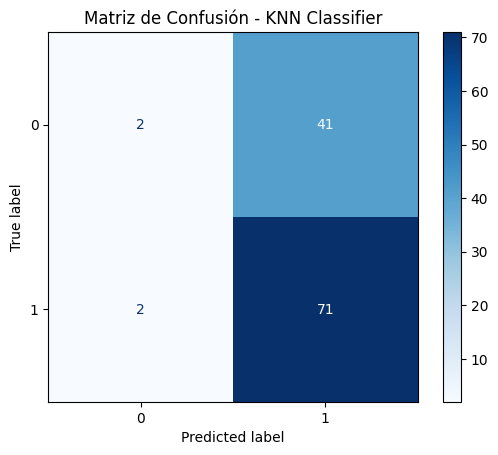

Logistic Regression
Accuracy: 0.65

Reporte clasificación:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09        43
           1       0.64      1.00      0.78        73

    accuracy                           0.65       116
   macro avg       0.82      0.52      0.43       116
weighted avg       0.77      0.65      0.52       116



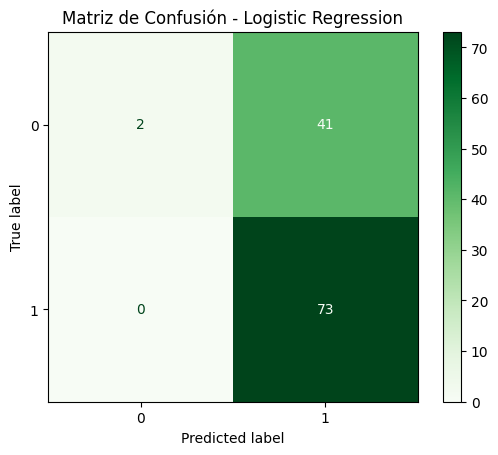

Random Forest Classifier
Accuracy: 0.62

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.48      0.23      0.31        43
           1       0.65      0.85      0.74        73

    accuracy                           0.62       116
   macro avg       0.56      0.54      0.53       116
weighted avg       0.59      0.62      0.58       116



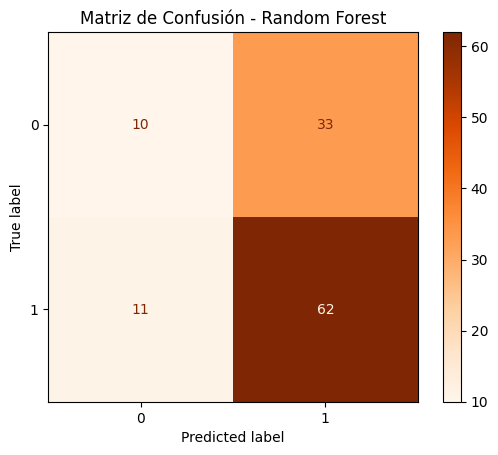

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("KNN Classifier")
print("Mejores parámetros:", knn_grid.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 2))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN Classifier")
plt.show()

print("Logistic Regression")
print("Accuracy:", round(accuracy_score(y_test, y_pred_line_Regresion),2))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_line_Regresion))


cm_log = confusion_matrix(y_test, y_pred_line_Regresion)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - Logistic Regression")
roc_path = r"C:\Users\gvald\Desktop\hepaticos\Paciente-_hepaticos\reports\matriz_conficion_Logistic.png" 
plt.savefig(roc_path)
plt.show()
plt.close()

print("Random Forest Classifier")
print("Accuracy:", round(accuracy_score(y_test, y_pred_forest_regressor),2) )
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_forest_regressor))

cm_rf = confusion_matrix(y_test, y_pred_forest_regressor)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# LightGBM para clasificacion Accuracy: 0.64

In [35]:
from sklearn.datasets import load_breast_cancer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import optuna
from sklearn.model_selection import train_test_split, cross_val_score

c:\Users\gvald\Desktop\hepaticos\Paciente-_hepaticos\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
# ColumnTransformer
pipeline_LightGBM_clasificacion = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [37]:
# Optuna
def objective_clf(trial):
  params = {
    "n_estimators": trial.suggest_int("n_estimators", 50, 500),
    "max_depth": trial.suggest_int("max_depth", 3, 30)
  }

  model = Pipeline([
    ("pre", pipeline_LightGBM_clasificacion),
    ("lgbm", LGBMClassifier(random_state=42, **params))
  ])

  score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
  return score.mean()

study_clf = optuna.create_study(direction="maximize")
study_clf.optimize(objective_clf, n_trials=50)
optuna_bparams = study_clf.best_params

print("Mejores hiperparámetros (clasificación):", optuna_bparams)

[I 2025-07-09 17:37:41,305] A new study created in memory with name: no-name-20ca2ae6-27b3-47e6-83ad-5e9a4bc60c3e
[I 2025-07-09 17:37:52,120] Trial 0 finished with value: 0.7191593352883675 and parameters: {'n_estimators': 180, 'max_depth': 29}. Best is trial 0 with value: 0.7191593352883675.
[I 2025-07-09 17:38:01,987] Trial 1 finished with value: 0.7191732998184612 and parameters: {'n_estimators': 163, 'max_depth': 29}. Best is trial 1 with value: 0.7191732998184612.
[I 2025-07-09 17:38:12,777] Trial 2 finished with value: 0.7364753526043848 and parameters: {'n_estimators': 56, 'max_depth': 30}. Best is trial 2 with value: 0.7364753526043848.
[I 2025-07-09 17:38:23,088] Trial 3 finished with value: 0.7235162686775589 and parameters: {'n_estimators': 248, 'max_depth': 4}. Best is trial 2 with value: 0.7364753526043848.
[I 2025-07-09 17:38:33,647] Trial 4 finished with value: 0.7321463482753806 and parameters: {'n_estimators': 201, 'max_depth': 7}. Best is trial 2 with value: 0.7364753

Mejores hiperparámetros (clasificación): {'n_estimators': 90, 'max_depth': 30}


In [38]:
# Pipeline.
model = Pipeline([
        ("pp", pipeline_LightGBM_clasificacion),
        ("model", LGBMClassifier( class_weight="balanced", random_state=42, **optuna_bparams))
    ])

In [39]:
# Entrenamiento.
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 341, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 463, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,steps,"[('pp', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
# Prediccion.
y_pred_lightbm = model.predict(X_test)

c:\Users\gvald\Desktop\hepaticos\Paciente-_hepaticos\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [41]:
# Evaluacion.
accuracy_lightbm = accuracy_score(y_test, y_pred_lightbm)
accuracy_lightbm

0.646551724137931

# SVM para clasificacion Accuracy:0.61

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [43]:
# ColumnTransformer
pipeline_SVM = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [44]:
def objective(trial):
    params = {
        "C": trial.suggest_float("C", 0.1, 100, log=True),
        "gamma": trial.suggest_float("gamma", 1e-4, 1.0, log=True),
        "kernel": "rbf",
        "class_weight": "balanced"  # muy importante para este dataset
    }

    model = Pipeline([
        ("pp", pipeline_SVM),
        ("clf", SVC(**params, random_state=42))
    ])

    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return score.mean()

In [45]:
# Optuna.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

best_params = study.best_params
print("Mejores hiperparámetros (clasificación):", best_params)

[I 2025-07-09 17:40:14,841] A new study created in memory with name: no-name-b3cd8dfc-bc47-4eab-a2b4-6237cfa18827
[I 2025-07-09 17:40:15,158] Trial 0 finished with value: 0.5593501636278634 and parameters: {'C': 0.16991902965527, 'gamma': 0.43975939923767005}. Best is trial 0 with value: 0.5593501636278634.
[I 2025-07-09 17:40:15,268] Trial 1 finished with value: 0.4428003740065451 and parameters: {'C': 24.997503273466425, 'gamma': 0.00012390508171259717}. Best is trial 0 with value: 0.5593501636278634.
[I 2025-07-09 17:40:15,376] Trial 2 finished with value: 0.5679289387564281 and parameters: {'C': 5.234415588807956, 'gamma': 0.06476233529299535}. Best is trial 2 with value: 0.5679289387564281.
[I 2025-07-09 17:40:15,475] Trial 3 finished with value: 0.5809256661991584 and parameters: {'C': 8.765682933672853, 'gamma': 0.08677439028204027}. Best is trial 3 with value: 0.5809256661991584.
[I 2025-07-09 17:40:15,595] Trial 4 finished with value: 0.5485741000467508 and parameters: {'C': 0

Mejores hiperparámetros (clasificación): {'C': 0.10766710401852102, 'gamma': 0.00043987593674604597}


In [46]:
# Pipeline.
model = Pipeline([
  ("pp", pipeline_SVM),
  ("model", SVC(**best_params,class_weight='balanced', random_state=42))
])

# Entrenamiento.
model.fit(X_train, y_train)

,steps,"[('pp', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [47]:
# Evaluar.
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {acc:.4f}")

Accuracy en test: 0.3707


# XGBOOST para clasificacion Accuracy: 0.62

In [48]:
from xgboost import XGBClassifier

In [49]:
# ColumnTransformer
pipeline_XGBOOST = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), num_cat)
])

In [50]:
# Optuna.
def objective(trial):
  params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5)
  }


  pipeline = Pipeline([
    ("pp", pipeline_XGBOOST),
    ("model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", **params))
  ])

  score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
  return score.mean()

In [53]:
# Optuna.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

best_params = study.best_params
print("Mejores hiperparámetros (clasificación):", best_params)

[I 2025-07-09 17:42:00,749] A new study created in memory with name: no-name-f8fc135c-8d48-4236-bd70-c99d328477d6


[I 2025-07-09 17:42:05,979] Trial 0 finished with value: 0.7322022063957547 and parameters: {'n_estimators': 209, 'max_depth': 8, 'subsample': 0.9157355113175563, 'colsample_bytree': 0.715115640574463, 'learning_rate': 0.018901317862078125, 'min_child_weight': 4, 'gamma': 2.5580072833823952}. Best is trial 0 with value: 0.7322022063957547.
[I 2025-07-09 17:42:07,674] Trial 1 finished with value: 0.7365451752548527 and parameters: {'n_estimators': 105, 'max_depth': 15, 'subsample': 0.987924421926877, 'colsample_bytree': 0.6429448175861054, 'learning_rate': 0.28177909840641274, 'min_child_weight': 10, 'gamma': 1.601671942842915}. Best is trial 1 with value: 0.7365451752548527.
[I 2025-07-09 17:42:09,474] Trial 2 finished with value: 0.7429967881580785 and parameters: {'n_estimators': 496, 'max_depth': 14, 'subsample': 0.8482341416475506, 'colsample_bytree': 0.6208350460787994, 'learning_rate': 0.025916983575305256, 'min_child_weight': 9, 'gamma': 2.9091626742949477}. Best is trial 2 with

Mejores hiperparámetros (clasificación): {'n_estimators': 144, 'max_depth': 14, 'subsample': 0.863714700886693, 'colsample_bytree': 0.8503015178417862, 'learning_rate': 0.026228211344943925, 'min_child_weight': 4, 'gamma': 3.0951841607814967}


In [54]:
# Pipeline.
model = Pipeline([
  ("pp", pipeline_XGBOOST),
  ("model", XGBClassifier(class_weight='balanced',random_state=42, use_label_encoder=False, eval_metric="logloss", **best_params))
])

In [55]:
# Entrenamiento.
model.fit(X_train, y_train)

c:\Users\gvald\Desktop\hepaticos\Paciente-_hepaticos\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:43:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('pp', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
# Evaluacion.
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {acc:.4f}")

Accuracy en test: 0.6207


# Curva ROC y AUC
1. Logistic Regression **AUC = 0.74**

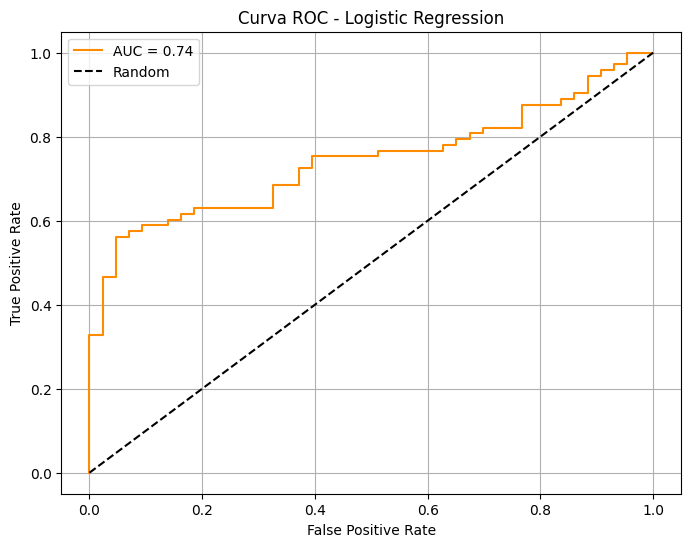

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
# Predecir probabilidades (clase positiva → 1)
y_probs = pipeline_line_Regresion.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR y AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Logistic Regression')
plt.legend()
plt.grid(True)
roc_path = r"C:\Users\gvald\Desktop\hepaticos\Paciente-_hepaticos\reports\Curva_roc_logistic.png" 
plt.savefig(roc_path)

plt.show()
plt.close()